# Graph the latency from recieving and aggregating batches by the # of rows in each batch
This will test the scalability of our kafka consumer by running it with the number of consumers

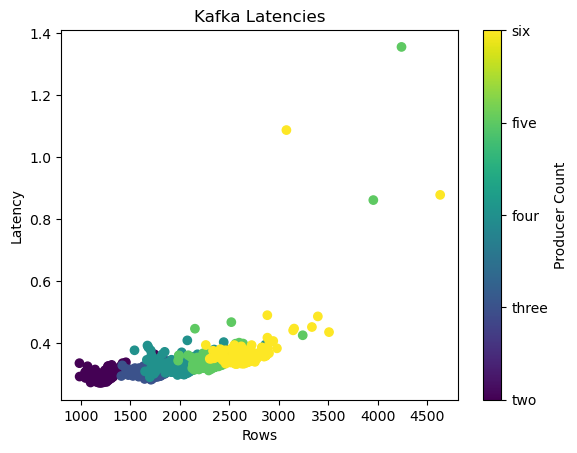

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
with open('data/latencies_kafka.json') as f:
    data = json.load(f)

# Flatten the JSON structure
flattened_data = []
for key, values in data.items():
    for entry in values:
        if isinstance(entry, dict):
            entry['key'] = key
            flattened_data.append(entry)
        else:
            flattened_data.append({'key': key, 'latency': entry})

# Convert flattened data to a pandas DataFrame
df = pd.DataFrame(flattened_data)

# Map keys to numerical values for coloring
key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
df['key_color'] = df['key'].map(key_mapping)

# Create a scatter plot
scatter = plt.scatter(df['rows'], df['latency'], c=df['key_color'], cmap='viridis')
plt.xlabel('Rows')
plt.ylabel('Latency')
plt.title('Kafka Latencies')

# Create a color bar with the correct labels
cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
cbar.ax.set_yticklabels(key_mapping.keys())
cbar.set_label('Producer Count')

plt.show()

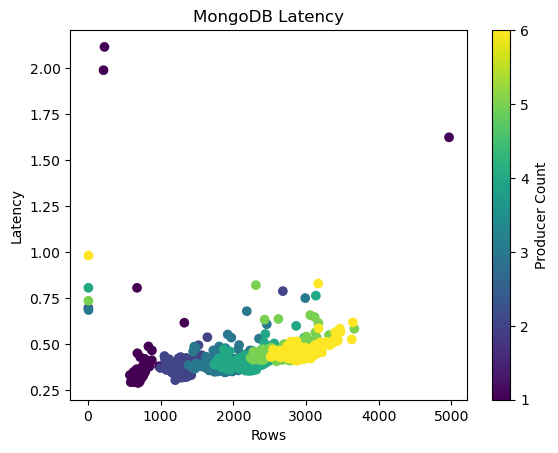

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
with open('data/latencies_batch_w_mongo.json') as f:
    data = json.load(f)

# Flatten the JSON structure
flattened_data = []
for key, values in data.items():
    for entry in values:
        if isinstance(entry, dict):
            entry['key'] = key
            flattened_data.append(entry)
        else:
            flattened_data.append({'key': key, 'latency': entry})

# Convert flattened data to a pandas DataFrame
df = pd.DataFrame(flattened_data)

# Map keys to numerical values for coloring
key_mapping = {key: idx for idx, key in enumerate(df['key'].unique())}
df['key_color'] = df['key'].map(key_mapping)

# Create a scatter plot
scatter = plt.scatter(df['rows'], df['latency'], c=df['key_color'], cmap='viridis')
plt.xlabel('Rows')
plt.ylabel('Latency')
plt.title('MongoDB Latency')

# Create a color bar with the correct labels
cbar = plt.colorbar(scatter, ticks=range(len(key_mapping)))
cbar.ax.set_yticklabels(key_mapping.keys())
cbar.set_label('Producer Count')

plt.show()